# Linear Bivariate BMM with SAMBA toy models : step mixing

The best way to learn Taweret is to use it. You can run, modify and experiment with this notebook [here.](https://mybinder.org/v2/gh/danOSU/Taweret/c2d8fd3ce3d74a5891d51adb5afc0afa0b503127?urlpath=lab%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FLinear_BMM_with_step_function_for_SAMBA_models.ipynb)



This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 11/10/2022

More about SAMBA toy models can be found in [Uncertainties here, there, and everywhere: interpolating between small- and large-g expansions using Bayesian Model Mixing](https://arxiv.org/abs/2206.04116)



In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed
# If using binder please uncomment the followings.
#sys.path.append("/home/jovyan/")
#sys.path.append("/home/jovyan/subpackages/SAMBA")

sys.path.append("/Users/dananjayaliyanage/temp2/Taweret")
sys.path.append("/Users/dananjayaliyanage/temp2/Taweret/subpackages/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np

## 1. Get toy models and the pseudo-experimental data

In [2]:
# Toy models from SAMBA
from Taweret.models import samba_models as toy_models

m1 = toy_models.Loworder(2, 'uninformative')
m2 = toy_models.Highorder(2, 'uninformative')
truth = toy_models.TrueModel()
exp = toy_models.Data()

In [3]:
g = np.linspace(0.1, 0.6, 10)
plot_g = np.linspace(0.01,1,100)
m1_prediction = m1.evaluate(plot_g)
m2_prediction = m2.evaluate(plot_g)
true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,error = 0.01)

/Users/dananjayaliyanage/temp2/Taweret/Taweret/models/samba_models.py:333: RuntimeWarning: invalid value encountered in reciprocal
  * self.x**(-2.0*self.order - 2)


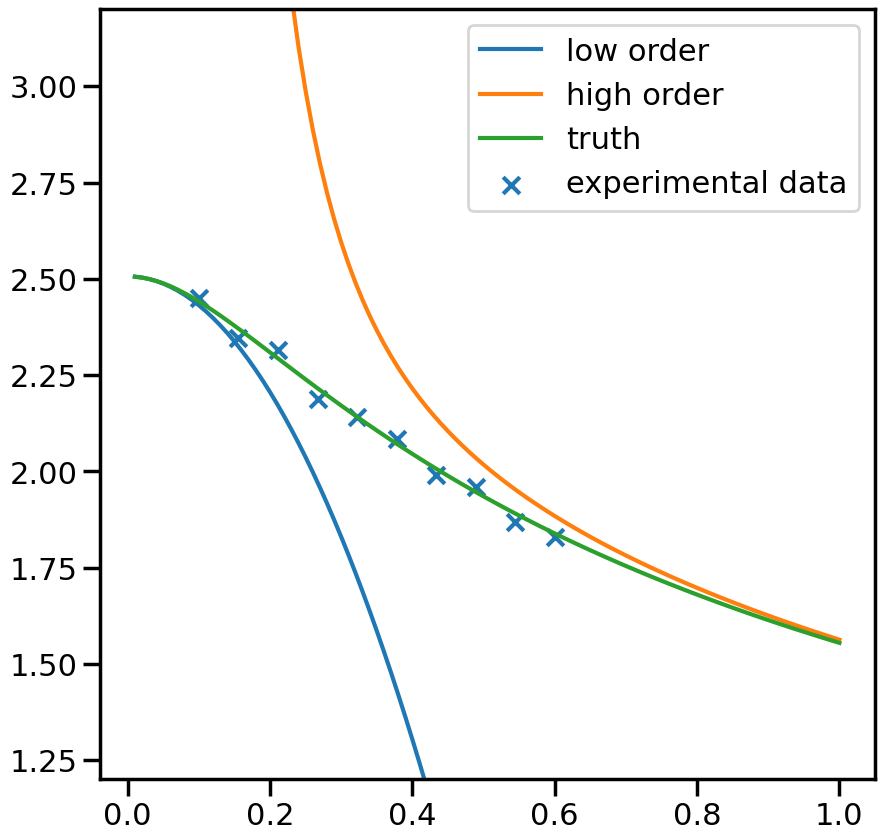

In [4]:

fig, ax_f = plt.subplots(figsize=(10,10))
ax_f.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax_f.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax_f.plot(plot_g, true_output[0], label='truth')
ax_f.scatter(g,exp_data[0], marker='x', label='experimental data')
ax_f.set_ylim(1.2,3.2)
ax_f.legend()

##  2. Choose a Mixing method

In [5]:
from Taweret.core.base_model import BaseModel
isinstance(m1, BaseModel)

True

In [6]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'low_order':m1,'high_order':m2}
mix_model = BL(models_dic=models, method='step')

step mixing function has 1                   free parameter(s)
To change the prior use `set_prior` method


In [7]:
#uncoment to change the prior from the default
#priors = bilby.core.prior.PriorDict()
#priors['step_0'] = bilby.core.prior.Uniform(0, 1, name="step_0")
#mix_model.set_prior(priors)

## 3. Train to find posterior

15:29 bilby INFO    : Running for label 'step_mix', output will be saved to 'outdir/samba_bivaraite'


15:29 bilby INFO    : Search parameters:
15:29 bilby INFO    :   step_0 = Uniform(minimum=0, maximum=1, name='step_0', latex_label='step_0', unit=None, boundary=None)


The following settings were                     provided for sampler 
{'sampler': 'ptemcee', 'ntemps': 5, 'nwalkers': 50, 'Tmax': 100, 'burn_in_fixed_discard': 50, 'nsamples': 2000, 'threads': 6, 'printdt': 60}


15:29 bilby INFO    : Single likelihood evaluation took 1.493e-03 s
15:29 bilby WARNING : Supplied argument 'printdt' not an argument of 'Ptemcee', removing.
15:29 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 5, 'nwalkers': 50, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
15:29 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_discard=50, mean_logl_frac=0.01, thin_by_nact=0.5, nsamples=2000, ignore_keys_for_tau=None, min_tau=1, niterations_per_check=5)
15:29 bilby INFO    : Generating pos0 samples
15:29 bilby INFO    : Starting to sample


1|0:00:00|nc:1.2e+03|a0:0.20-1.00|swp:0.61-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.26ms/ev
2|0:00:00|nc:2.5e+03|a0:0.30-1.00|swp:0.58-0.94|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.36ms/ev
3|0:00:01|nc:3.8e+03|a0:0.40-1.00|swp:0.57-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.32ms/ev
4|0:00:01|nc:5.0e+03|a0:0.50-1.00|swp:0.57-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.31ms/ev
5|0:00:01|nc:6.2e+03|a0:0.52-0.92|swp:0.57-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.24ms/ev
6|0:00:02|nc:7.5e+03|a0:0.53-0.90|swp:0.57-0.92|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.27ms/ev
7|0:00:02|nc:8.8e+03|a0:0.57-0.89|swp:0.58-0.92|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.28ms/ev
8|0:00:02|nc:1.0e+04|a0:0.60-0.88|swp:0.59-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.29ms/ev
9|0:00:03|nc:1.1e+04|a0:0.56-0.87|swp:0.59-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.27ms/ev
10|0:00:03|nc:1.2e+04|a0:0.58-0.88|swp:0.60-0.93|n:nan<2000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
11|0:00:03|nc:1.4e+04|a0:0.58-0.87|swp:0.60-0.93|n:nan<2000|t!nan(+nan,+nan)|q:

15:31 bilby INFO    : Finished sampling
15:31 bilby INFO    : Writing checkpoint and diagnostics
15:31 bilby INFO    : Finished writing checkpoint
15:31 bilby INFO    : Walkers plot failed with exception cannot unpack non-iterable AxesSubplot object
15:31 bilby INFO    : Sampling time: 0:02:10.442222
15:31 bilby INFO    : Summary of results:
nsamples: 2100
ln_noise_evidence:    nan
ln_evidence:  3.763 +/-  1.192
ln_bayes_factor:    nan +/-  1.192



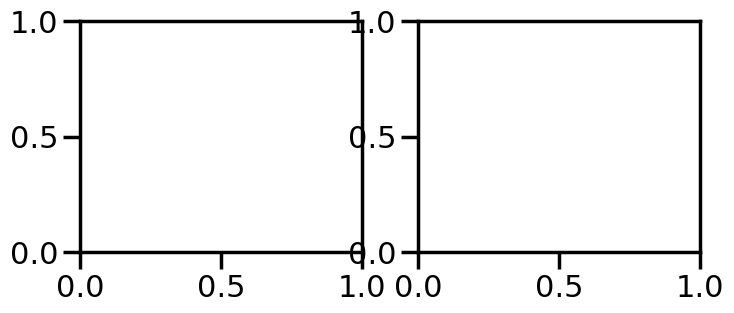

In [9]:
y_exp = np.array(exp_data[0]).reshape(1,-1)
y_err = np.array(exp_data[1]).reshape(1,-1)
# The parameters are set to minimum values for computational ease.
# You should increase the ntemps, nwalkers and nsamples and see
# if your results are changing. If so keep increasing them
# until convergence of results. 

kwargs_for_sampler = {'sampler': 'ptemcee',
                    'ntemps': 5,
                    'nwalkers': 50,
                    'Tmax': 100,
                    'burn_in_fixed_discard': 50,
                    'nsamples': 2000,
                    'threads': 6,
                    'printdt': 60}

result = mix_model.train(x_exp=g, y_exp=y_exp, y_err=y_err, outdir = 'outdir/samba_bivaraite', label='step_mix',
                          kwargs_for_sampler=kwargs_for_sampler)

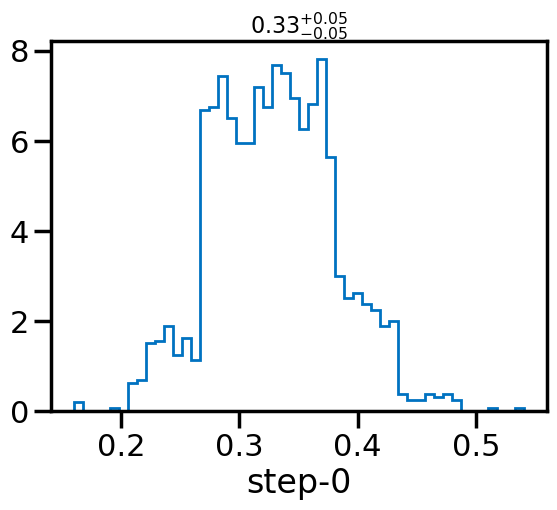

In [10]:
# Posterior of the mixing parameters. 
result.plot_corner()

## 4. Predictions

In [11]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 1)
using provided samples instead of posterior


In [12]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [13]:
# Map value prediction for the step mixing function parameter
map_prediction = mix_model.evaluate(mix_model.map, plot_g)

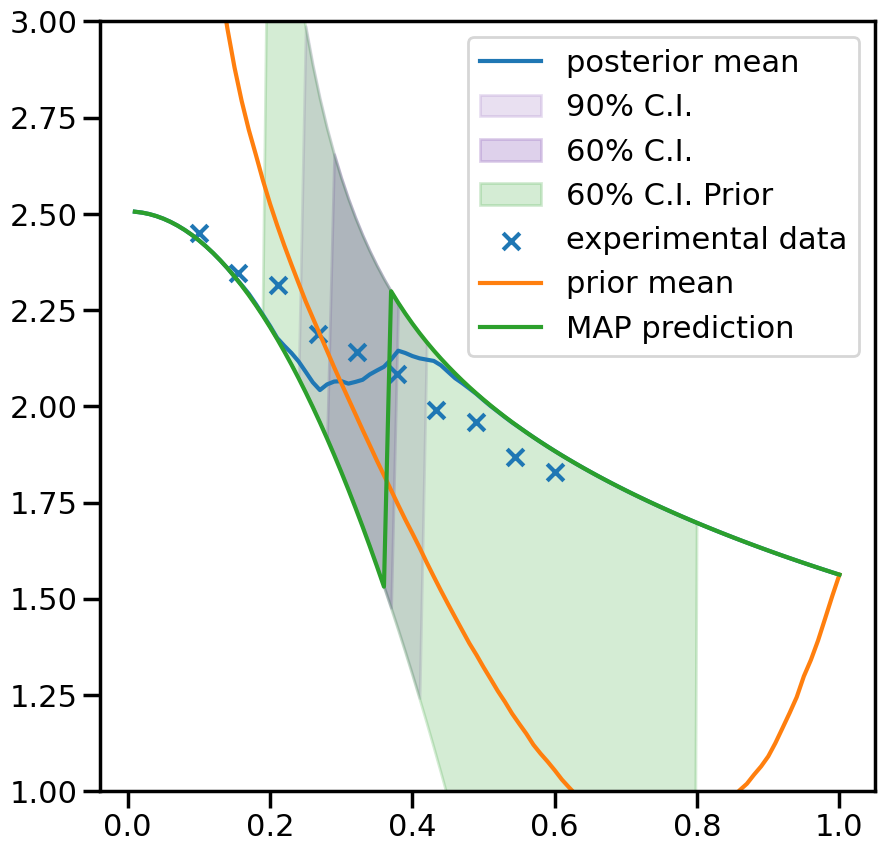

In [14]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean.flatten(), label='posterior mean')
ax.fill_between(plot_g,per5.flatten(),per95.flatten(),color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20.flatten(),per80.flatten(), color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20.flatten(),prior80.flatten(),color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.scatter(g,exp_data[0], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior.flatten(), label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(1,3)
ax.legend()